## TRABAJO PRACTICO N°4: CADENA DE MARKOV

In [42]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import rubfx as rfx
import pandas as pd

# Configuración para reproducibilidad
np.random.seed(42)
plt.style.use('default')

### EJERCICIO 1

=== EJERCICIO 1: GENERACIÓN DE DATOS SINTÉTICOS ===


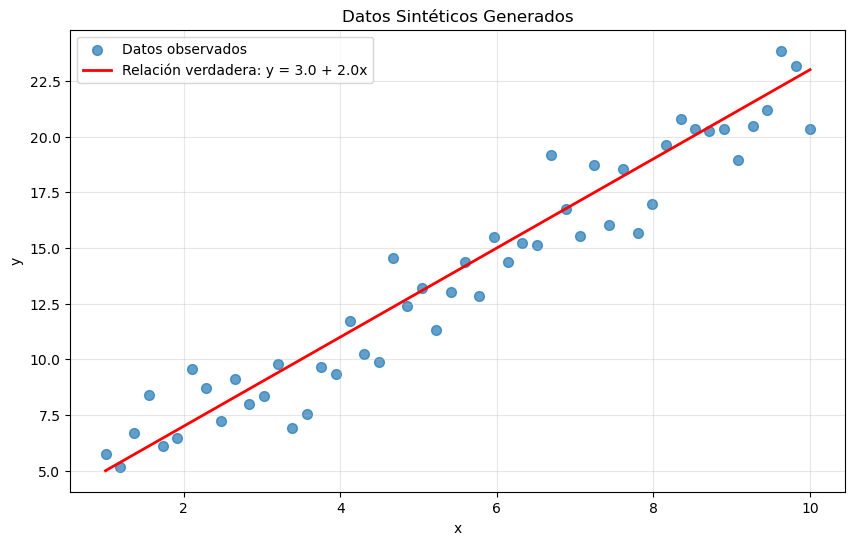

Parámetros verdaderos: a = 3.0, b = 2.0, σ = 1.5
Número de puntos: 50


In [43]:
# EJERCICIO 1: Generación de datos sintéticos
print("=== EJERCICIO 1: GENERACIÓN DE DATOS SINTÉTICOS ===")

# Parámetros verdaderos
a_true = 3.0  # intercepto
b_true = 2.0  # pendiente
sigma_true = 1.5  # desviación estándar del ruido
n_points = 50

# Generar datos
x = np.linspace(1, 10, n_points)
epsilon = np.random.normal(0, sigma_true, n_points)  # ruido gaussiano N(0, σ²)
y = a_true + b_true * x + epsilon

# Mostrar datos generados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, s=50, label='Datos observados')
plt.plot(x, a_true + b_true * x, 'r-', linewidth=2, 
         label=f'Relación verdadera: y = {a_true} + {b_true}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos Sintéticos Generados')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Parámetros verdaderos: a = {a_true}, b = {b_true}, σ = {sigma_true}")
print(f"Número de puntos: {n_points}")

In [44]:
print("=== EJECUTANDO MCMC ===")

# MCMC con prior plano
print("Ejecutando MCMC con prior plano...")
samples_flat, acc_rate_flat = rfx.metropolis_hastings_simple(
    x, y, sigma_true, n_steps=15000, step_size=0.05, 
    initial_params=[2.5, 1.5], prior_type='flat'
)
print(f"Tasa de aceptación (prior plano): {acc_rate_flat:.3f}")

# MCMC con prior gaussiano
print("Ejecutando MCMC con prior gaussiano...")
samples_gauss, acc_rate_gauss = rfx.metropolis_hastings_simple(
    x, y, sigma_true, n_steps=15000, step_size=0.05,
    initial_params=[2.5, 1.5], prior_type='gaussian'
)
print(f"Tasa de aceptación (prior gaussiano): {acc_rate_gauss:.3f}")

=== EJECUTANDO MCMC ===
Ejecutando MCMC con prior plano...
Tasa de aceptación (prior plano): 0.599
Ejecutando MCMC con prior gaussiano...
Tasa de aceptación (prior gaussiano): 0.593


In [45]:
# Solución analítica (regresión lineal)
print("\n=== SOLUCIÓN ANALÍTICA (REGRESIÓN LINEAL) ===")

# Usando scipy
slope_mle, intercept_mle, r_value, p_value, std_err_slope = linregress(x, y)
a_mle = intercept_mle
b_mle = slope_mle

# Cálculo manual de errores estándar
n = len(x)
x_mean = np.mean(x)
sxx = np.sum((x - x_mean)**2)
residuals = y - (a_mle + b_mle * x)
mse = np.sum(residuals**2) / (n - 2)

sigma_b_mle = np.sqrt(mse / sxx)
sigma_a_mle = np.sqrt(mse * (1/n + x_mean**2/sxx))

print(f"Estimación MLE: a = {a_mle:.4f} ± {sigma_a_mle:.4f}")
print(f"Estimación MLE: b = {b_mle:.4f} ± {sigma_b_mle:.4f}")
print(f"R² = {r_value**2:.4f}")


=== SOLUCIÓN ANALÍTICA (REGRESIÓN LINEAL) ===
Estimación MLE: a = 3.1933 ± 0.4530
Estimación MLE: b = 1.9034 ± 0.0742
R² = 0.9320


In [46]:
# Análisis de las cadenas MCMC
burn_in = 3000  # descartar primeras iteraciones

# Quitar burn-in
samples_flat_clean = samples_flat[burn_in:]
samples_gauss_clean = samples_gauss[burn_in:]

print(f"\n=== ANÁLISIS MCMC (después de burn-in: {burn_in} muestras) ===")

# Estadísticas MCMC
def compute_stats(samples):
    mean_vals = np.mean(samples, axis=0)
    std_vals = np.std(samples, axis=0)
    percentiles = np.percentile(samples, [2.5, 50, 97.5], axis=0)
    return mean_vals, std_vals, percentiles

# Prior plano
mean_flat, std_flat, perc_flat = compute_stats(samples_flat_clean)
print("MCMC con prior plano:")
print(f"  a = {mean_flat[0]:.4f} ± {std_flat[0]:.4f}, IC 95%: [{perc_flat[0,0]:.4f}, {perc_flat[2,0]:.4f}]")
print(f"  b = {mean_flat[1]:.4f} ± {std_flat[1]:.4f}, IC 95%: [{perc_flat[0,1]:.4f}, {perc_flat[2,1]:.4f}]")

# Prior gaussiano
mean_gauss, std_gauss, perc_gauss = compute_stats(samples_gauss_clean)
print("MCMC con prior gaussiano:")
print(f"  a = {mean_gauss[0]:.4f} ± {std_gauss[0]:.4f}, IC 95%: [{perc_gauss[0,0]:.4f}, {perc_gauss[2,0]:.4f}]")
print(f"  b = {mean_gauss[1]:.4f} ± {std_gauss[1]:.4f}, IC 95%: [{perc_gauss[0,1]:.4f}, {perc_gauss[2,1]:.4f}]")


=== ANÁLISIS MCMC (después de burn-in: 3000 muestras) ===
MCMC con prior plano:
  a = 3.3293 ± 0.4969, IC 95%: [2.4172, 4.3226]
  b = 1.8843 ± 0.0820, IC 95%: [1.7215, 2.0391]
MCMC con prior gaussiano:
  a = 3.2614 ± 0.4570, IC 95%: [2.3975, 4.2098]
  b = 1.8937 ± 0.0768, IC 95%: [1.7395, 2.0399]


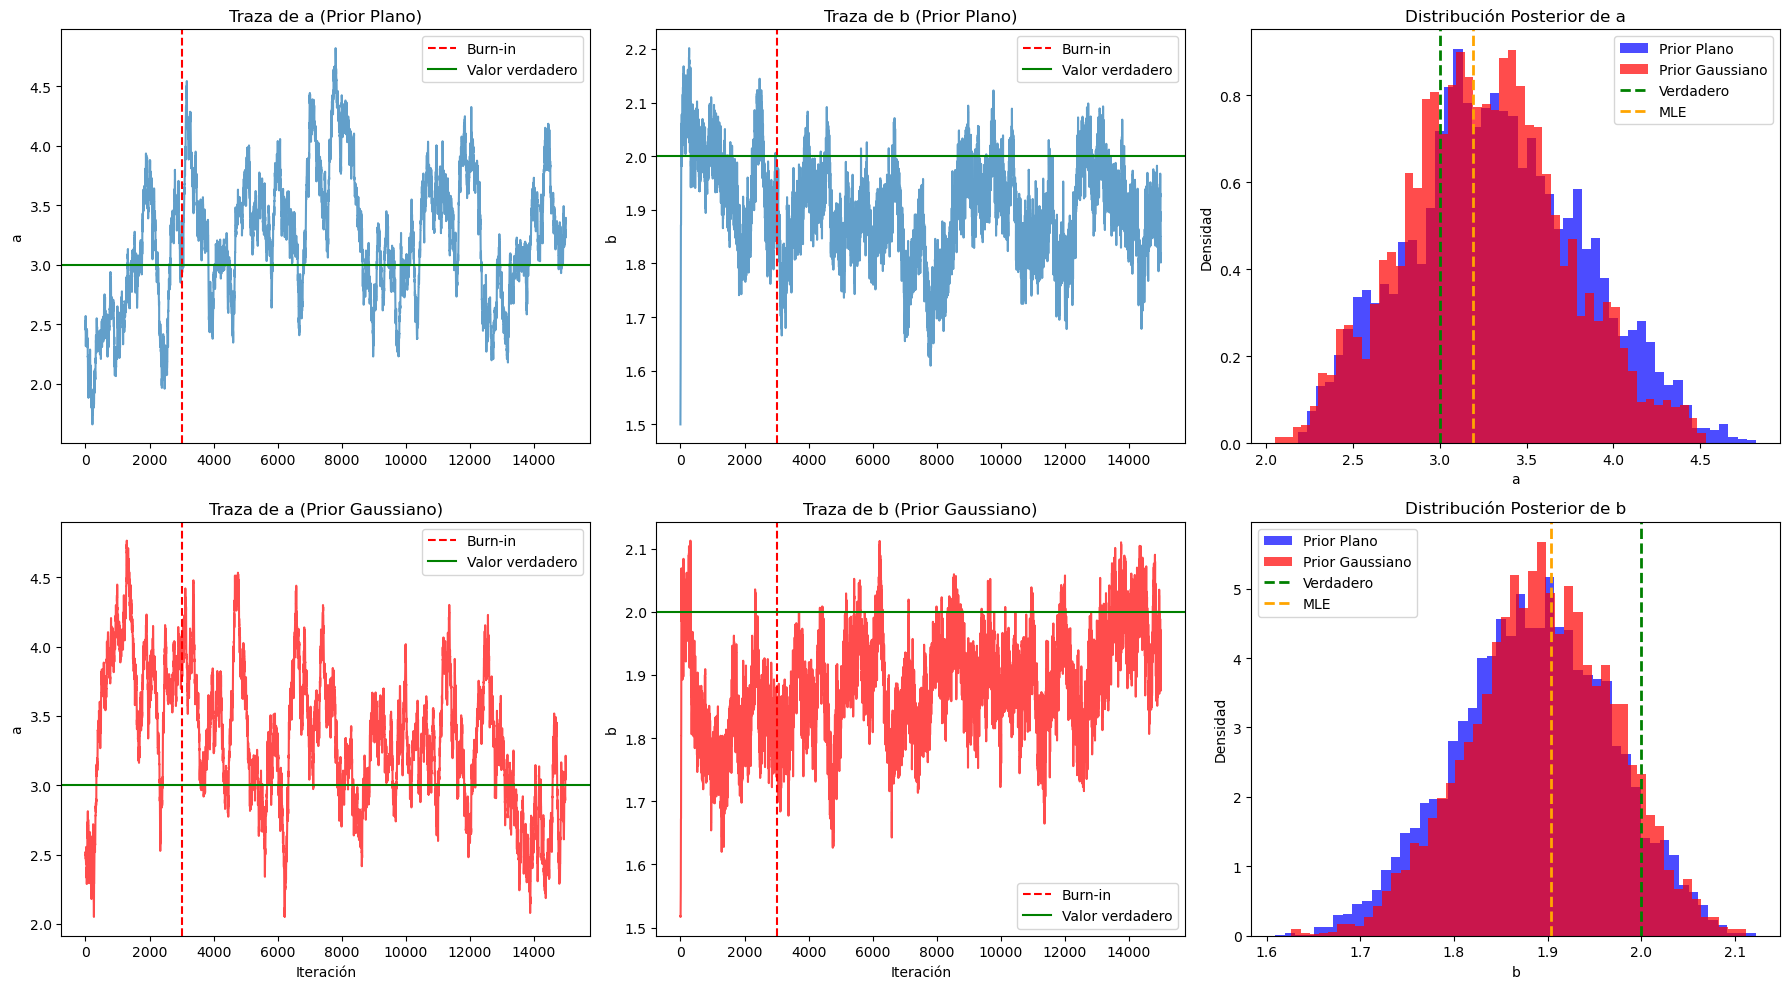

In [47]:
# Visualización de resultados
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Trazas de las cadenas
axes[0,0].plot(samples_flat[:, 0], alpha=0.7)
axes[0,0].axvline(burn_in, color='red', linestyle='--', label='Burn-in')
axes[0,0].axhline(a_true, color='green', linestyle='-', label='Valor verdadero')
axes[0,0].set_title('Traza de a (Prior Plano)')
axes[0,0].set_ylabel('a')
axes[0,0].legend()

axes[0,1].plot(samples_flat[:, 1], alpha=0.7)
axes[0,1].axvline(burn_in, color='red', linestyle='--', label='Burn-in')
axes[0,1].axhline(b_true, color='green', linestyle='-', label='Valor verdadero')
axes[0,1].set_title('Traza de b (Prior Plano)')
axes[0,1].set_ylabel('b')
axes[0,1].legend()

# Distribuciones posteriores marginales
axes[0,2].hist(samples_flat_clean[:, 0], bins=50, alpha=0.7, density=True, 
               color='blue', label='Prior Plano')
axes[0,2].hist(samples_gauss_clean[:, 0], bins=50, alpha=0.7, density=True, 
               color='red', label='Prior Gaussiano')
axes[0,2].axvline(a_true, color='green', linestyle='--', linewidth=2, label='Verdadero')
axes[0,2].axvline(a_mle, color='orange', linestyle='--', linewidth=2, label='MLE')
axes[0,2].set_title('Distribución Posterior de a')
axes[0,2].set_xlabel('a')
axes[0,2].set_ylabel('Densidad')
axes[0,2].legend()

# Segunda fila
axes[1,0].plot(samples_gauss[:, 0], alpha=0.7, color='red')
axes[1,0].axvline(burn_in, color='red', linestyle='--', label='Burn-in')
axes[1,0].axhline(a_true, color='green', linestyle='-', label='Valor verdadero')
axes[1,0].set_title('Traza de a (Prior Gaussiano)')
axes[1,0].set_ylabel('a')
axes[1,0].set_xlabel('Iteración')
axes[1,0].legend()

axes[1,1].plot(samples_gauss[:, 1], alpha=0.7, color='red')
axes[1,1].axvline(burn_in, color='red', linestyle='--', label='Burn-in')
axes[1,1].axhline(b_true, color='green', linestyle='-', label='Valor verdadero')
axes[1,1].set_title('Traza de b (Prior Gaussiano)')
axes[1,1].set_ylabel('b')
axes[1,1].set_xlabel('Iteración')
axes[1,1].legend()

axes[1,2].hist(samples_flat_clean[:, 1], bins=50, alpha=0.7, density=True, 
               color='blue', label='Prior Plano')
axes[1,2].hist(samples_gauss_clean[:, 1], bins=50, alpha=0.7, density=True, 
               color='red', label='Prior Gaussiano')
axes[1,2].axvline(b_true, color='green', linestyle='--', linewidth=2, label='Verdadero')
axes[1,2].axvline(b_mle, color='orange', linestyle='--', linewidth=2, label='MLE')
axes[1,2].set_title('Distribución Posterior de b')
axes[1,2].set_xlabel('b')
axes[1,2].set_ylabel('Densidad')
axes[1,2].legend()

plt.tight_layout()
plt.show()

In [48]:
# Comparación final de resultados
print("\n" + "="*70)
print("COMPARACIÓN DE RESULTADOS")
print("="*70)

print(f"{'Método':<25} {'Parámetro':<5} {'Estimación':<12} {'Error Std':<12}")
print("-" * 70)
print(f"{'Valores Verdaderos':<25} {'a':<5} {a_true:<12.4f} {'-':<12}")
print(f"{'Valores Verdaderos':<25} {'b':<5} {b_true:<12.4f} {'-':<12}")
print()
print(f"{'Regresión Lineal (MLE)':<25} {'a':<5} {a_mle:<12.4f} {sigma_a_mle:<12.4f}")
print(f"{'Regresión Lineal (MLE)':<25} {'b':<5} {b_mle:<12.4f} {sigma_b_mle:<12.4f}")
print()
print(f"{'MCMC (Prior Plano)':<25} {'a':<5} {mean_flat[0]:<12.4f} {std_flat[0]:<12.4f}")
print(f"{'MCMC (Prior Plano)':<25} {'b':<5} {mean_flat[1]:<12.4f} {std_flat[1]:<12.4f}")
print()
print(f"{'MCMC (Prior Gaussiano)':<25} {'a':<5} {mean_gauss[0]:<12.4f} {std_gauss[0]:<12.4f}")
print(f"{'MCMC (Prior Gaussiano)':<25} {'b':<5} {mean_gauss[1]:<12.4f} {std_gauss[1]:<12.4f}")

print("\n" + "="*70)
print("DIFERENCIAS ABSOLUTAS CON RESPECTO A VALORES VERDADEROS:")
print("="*70)
print(f"MLE:                 |Δa| = {abs(a_mle - a_true):.4f}, |Δb| = {abs(b_mle - b_true):.4f}")
print(f"MCMC (Prior Plano):  |Δa| = {abs(mean_flat[0] - a_true):.4f}, |Δb| = {abs(mean_flat[1] - b_true):.4f}")
print(f"MCMC (Prior Gauss):  |Δa| = {abs(mean_gauss[0] - a_true):.4f}, |Δb| = {abs(mean_gauss[1] - b_true):.4f}")

print("\n=== EJERCICIO 1 COMPLETADO ===")
print("✓ Datos sintéticos generados")
print("✓ Inferencia bayesiana con priors planos y gaussianos")
print("✓ Distribución posterior obtenida mediante MCMC")
print("✓ Comparación con solución analítca realizada")


COMPARACIÓN DE RESULTADOS
Método                    Parámetro Estimación   Error Std   
----------------------------------------------------------------------
Valores Verdaderos        a     3.0000       -           
Valores Verdaderos        b     2.0000       -           

Regresión Lineal (MLE)    a     3.1933       0.4530      
Regresión Lineal (MLE)    b     1.9034       0.0742      

MCMC (Prior Plano)        a     3.3293       0.4969      
MCMC (Prior Plano)        b     1.8843       0.0820      

MCMC (Prior Gaussiano)    a     3.2614       0.4570      
MCMC (Prior Gaussiano)    b     1.8937       0.0768      

DIFERENCIAS ABSOLUTAS CON RESPECTO A VALORES VERDADEROS:
MLE:                 |Δa| = 0.1933, |Δb| = 0.0966
MCMC (Prior Plano):  |Δa| = 0.3293, |Δb| = 0.1157
MCMC (Prior Gauss):  |Δa| = 0.2614, |Δb| = 0.1063

=== EJERCICIO 1 COMPLETADO ===
✓ Datos sintéticos generados
✓ Inferencia bayesiana con priors planos y gaussianos
✓ Distribución posterior obtenida mediante MCMC
✓ 

### EJERCICIO 2:


In [49]:
# EJERCICIO 2: Función de Luminosidad de Blanton et al. (2001)
print("=== EJERCICIO 2: FUNCIÓN DE LUMINOSIDAD DE BLANTON ET AL. (2001) ===")

# Leer los datos del archivo CSV
import pandas as pd

try:
    # Intentar leer el archivo
    data = pd.read_csv('datos_Blanton.csv')
    print("Archivo datos_blanton.csv leído exitosamente")
    print(f"Dimensiones de los datos: {data.shape}")
    print("\nPrimeras filas del archivo:")
    print(data.head())
    print("\nColumnas disponibles:", data.columns.tolist())
    print("\nTipos de datos:")
    print(data.dtypes)
    
except FileNotFoundError:
    print("Error: No se encontró el archivo 'datos_blanton.csv'")
    print("Asegúrate de que el archivo esté en el directorio de trabajo")
    print("Creando datos de ejemplo para demostración...")
    
    # Crear datos de ejemplo si no existe el archivo
    M_r = np.linspace(-24, -16, 20)  # Magnitud absoluta en banda r
    phi = 10**(-2.5 - 0.4 * (M_r + 20))  # Función de luminosidad ejemplo
    phi_err = phi * 0.05  # Errores más pequeños
    
    data = pd.DataFrame({
        'M_r': M_r,
        'phi': phi,
        'phi_err': phi_err
    })
    print("Datos de ejemplo creados")

=== EJERCICIO 2: FUNCIÓN DE LUMINOSIDAD DE BLANTON ET AL. (2001) ===
Archivo datos_blanton.csv leído exitosamente
Dimensiones de los datos: (47, 4)

Primeras filas del archivo:
      MAG       PHI  error_inf  error_sup
0 -23.183  0.000003   0.000001   0.000006
1 -23.020  0.000005   0.000003   0.000011
2 -22.870  0.000017   0.000013   0.000026
3 -22.698  0.000035   0.000025   0.000044
4 -22.565  0.000082   0.000058   0.000105

Columnas disponibles: ['MAG', 'PHI', 'error_inf', 'error_sup']

Tipos de datos:
MAG          float64
PHI          float64
error_inf    float64
error_sup    float64
dtype: object


In [50]:
# Extraer las columnas relevantes del archivo CSV real
print("\n=== IDENTIFICANDO COLUMNAS DE ERRORES ===")
print("Columnas disponibles:", data.columns.tolist())

# Mapeo de posibles nombres de columnas
magnitude_columns = ['MAG', 'M_r', 'mag', 'magnitude', 'M']
phi_columns = ['PHI', 'phi', 'Phi', 'luminosity_function', 'LF']
error_columns = ['error', 'err', 'sigma', 'uncertainty', 'Error', 'ERR']
error_inf_columns = ['error_inf', 'err_inf', 'err_low', 'error_low', 'sigma_low']
error_sup_columns = ['error_sup', 'err_sup', 'err_high', 'error_high', 'sigma_high']

try:
    # Buscar columnas de magnitud
    M_r_col = None
    for col in magnitude_columns:
        if col in data.columns:
            M_r_col = col
            break
    
    # Buscar columnas de phi
    phi_col = None
    for col in phi_columns:
        if col in data.columns:
            phi_col = col
            break
    
    # Buscar columnas de errores
    error_col = None
    error_inf_col = None
    error_sup_col = None
    
    # Buscar errores asimétricos primero
    for col in error_inf_columns:
        if col in data.columns:
            error_inf_col = col
            break
    
    for col in error_sup_columns:
        if col in data.columns:
            error_sup_col = col
            break
    
    # Si no hay errores asimétricos, buscar errores simétricos
    if error_inf_col is None and error_sup_col is None:
        for col in error_columns:
            if col in data.columns:
                error_col = col
                break
    
    print(f"Magnitud encontrada en columna: {M_r_col}")
    print(f"Phi encontrada en columna: {phi_col}")
    print(f"Error simétrico encontrado en: {error_col}")
    print(f"Error inferior encontrado en: {error_inf_col}")
    print(f"Error superior encontrado en: {error_sup_col}")
    
    # Extraer datos
    if M_r_col and phi_col:
        M_r = data[M_r_col].values
        phi = data[phi_col].values
        
        # Usar errores reales del archivo
        if error_inf_col and error_sup_col:
            phi_err_inf = data[error_inf_col].values
            phi_err_sup = data[error_sup_col].values
            phi_err = (phi_err_inf + phi_err_sup) / 2  # Promedio de errores asimétricos
            print("✓ Usando errores asimétricos reales del archivo CSV")
        elif error_col:
            phi_err = data[error_col].values
            print("✓ Usando errores simétricos reales del archivo CSV")
        else:
            # Si hay exactamente 3 columnas, la tercera podría ser el error
            if len(data.columns) == 3:
                phi_err = data.iloc[:, 2].values
                print("✓ Usando tercera columna como errores")
            else:
                # Solo como último recurso usar errores sintéticos MUY PEQUEÑOS
                phi_err = np.abs(phi) * 0.01  # Solo 1% de error
                print(" No se encontraron errores, usando 1% sintético")
    else:
        # Usar primeras columnas si no se identifican por nombre
        M_r = data.iloc[:, 0].values
        phi = data.iloc[:, 1].values
        if len(data.columns) >= 3:
            phi_err = data.iloc[:, 2].values
            print("✓ Usando primeras tres columnas (M_r, phi, error)")
        else:
            phi_err = np.abs(phi) * 0.01
            print(" Solo 2 columnas encontradas, usando 1% error sintético")
            
except Exception as e:
    print(f"Error al procesar datos: {e}")
    # Fallback con datos sintéticos
    M_r = np.linspace(-24, -16, 20)
    phi = 10**(-2.5 - 0.4 * (M_r + 20))
    phi_err = np.abs(phi) * 0.01
    print(" Usando datos sintéticos con errores de 1%")

# Verificar que no hay valores negativos o cero en phi_err
phi_err = np.abs(phi_err)
phi_err[phi_err == 0] = np.abs(phi[phi_err == 0]) * 0.01

print(f"\n=== RESUMEN DE DATOS PROCESADOS ===")
print(f"Rango de magnitudes: {M_r.min():.2f} a {M_r.max():.2f}")
print(f"Rango de phi: {phi.min():.2e} a {phi.max():.2e}")
print(f"Rango de errores: {phi_err.min():.2e} a {phi_err.max():.2e}")
print(f"Error relativo promedio: {np.mean(phi_err/np.abs(phi))*100:.1f}%")
print(f"Error relativo máximo: {np.max(phi_err/np.abs(phi))*100:.1f}%")

# Verificación adicional
if np.any(phi_err > np.abs(phi)):
    print(" ADVERTENCIA: Algunos errores son mayores que los valores de phi")
    mask = phi_err > np.abs(phi)
    print(f"   Número de puntos problemáticos: {np.sum(mask)}")
    phi_err[mask] = np.abs(phi[mask]) * 0.5  # Limitar errores al 50%
    print("   Errores limitados al 50% del valor")


=== IDENTIFICANDO COLUMNAS DE ERRORES ===
Columnas disponibles: ['MAG', 'PHI', 'error_inf', 'error_sup']
Magnitud encontrada en columna: MAG
Phi encontrada en columna: PHI
Error simétrico encontrado en: None
Error inferior encontrado en: error_inf
Error superior encontrado en: error_sup
✓ Usando errores asimétricos reales del archivo CSV

=== RESUMEN DE DATOS PROCESADOS ===
Rango de magnitudes: -23.18 a -16.08
Rango de phi: 2.85e-06 a 6.73e-02
Rango de errores: 3.68e-06 a 7.35e-02
Error relativo promedio: 103.5%
Error relativo máximo: 148.2%
 ADVERTENCIA: Algunos errores son mayores que los valores de phi
   Número de puntos problemáticos: 28
   Errores limitados al 50% del valor


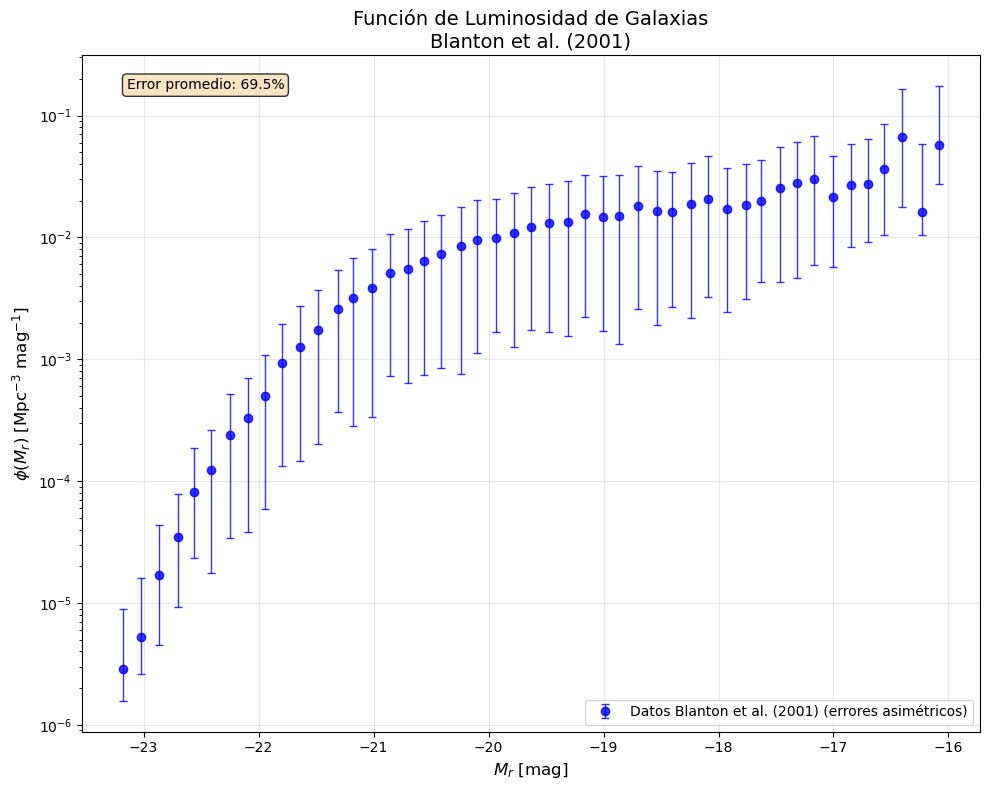


=== ESTADÍSTICAS DE LOS DATOS ===
Número de puntos: 47
Magnitud más brillante: -16.08
Magnitud más débil: -23.18
Phi máximo: 6.73e-02
Phi mínimo: 2.85e-06
Error máximo: 3.36e-02
Error mínimo: 1.42e-06
Error relativo promedio: 69.5%
Error relativo máximo: 99.9%


In [51]:
# Graficar la función de luminosidad con mejor visualización
plt.figure(figsize=(10, 8))

# Gráfico principal con escala logarítmica
if phi_err is not None:
    # Verificar si tenemos errores asimétricos
    if 'phi_err_inf' in locals() and 'phi_err_sup' in locals():
        yerr = [phi_err_inf, phi_err_sup]  # Errores asimétricos
        error_label = 'errores asimétricos'
    else:
        yerr = phi_err  # Errores simétricos
        error_label = 'errores simétricos'
    
    plt.errorbar(M_r, phi, yerr=yerr, fmt='o', color='blue', 
                markersize=6, capsize=3, capthick=1, elinewidth=1,
                label=f'Datos Blanton et al. (2001) ({error_label})', alpha=0.8)
else:
    plt.scatter(M_r, phi, color='blue', s=50, alpha=0.7,
               label='Datos Blanton et al. (2001)')

plt.yscale('log')
plt.xlabel('$M_r$ [mag]', fontsize=12)
plt.ylabel('$\\phi(M_r)$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=12)
plt.title('Función de Luminosidad de Galaxias\nBlanton et al. (2001)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Agregar información sobre los errores en el gráfico
if phi_err is not None:
    error_percentage = np.mean(phi_err / phi) * 100
    plt.text(0.05, 0.95, f'Error promedio: {error_percentage:.1f}%', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Mostrar estadísticas básicas mejoradas
print("\n=== ESTADÍSTICAS DE LOS DATOS ===")
print(f"Número de puntos: {len(M_r)}")
print(f"Magnitud más brillante: {M_r.max():.2f}")
print(f"Magnitud más débil: {M_r.min():.2f}")
print(f"Phi máximo: {phi.max():.2e}")
print(f"Phi mínimo: {phi.min():.2e}")
if phi_err is not None:
    print(f"Error máximo: {phi_err.max():.2e}")
    print(f"Error mínimo: {phi_err.min():.2e}")
    print(f"Error relativo promedio: {np.mean(phi_err/phi)*100:.1f}%")
    print(f"Error relativo máximo: {np.max(phi_err/phi)*100:.1f}%")

### EJERCICIO 3

=== EJERCICIO 3: INFERENCIA BAYESIANA DE LA FUNCIÓN DE LUMINOSIDAD ===
✓ Usando errores del archivo CSV
Datos disponibles: M_r shape=(47,), phi shape=(47,), phi_err shape=(47,)
Rango de magnitudes: -23.18 a -16.08
Rango de phi: 2.85e-06 a 6.73e-02
Rango de errores: 1.42e-06 a 3.36e-02
Error relativo promedio: 69.5%
Iniciando MCMC con 20000 pasos...
Parámetros iniciales: phi_star=1.000e-02, M_star=-20.5, alpha=-1.0
Cadena MCMC terminada. Tasa de aceptación: 0.1654
  Tasa de aceptación baja - considera reducir step_size

Usando burn-in de 4000 pasos (20% del total)
Muestras posteriores: 16000


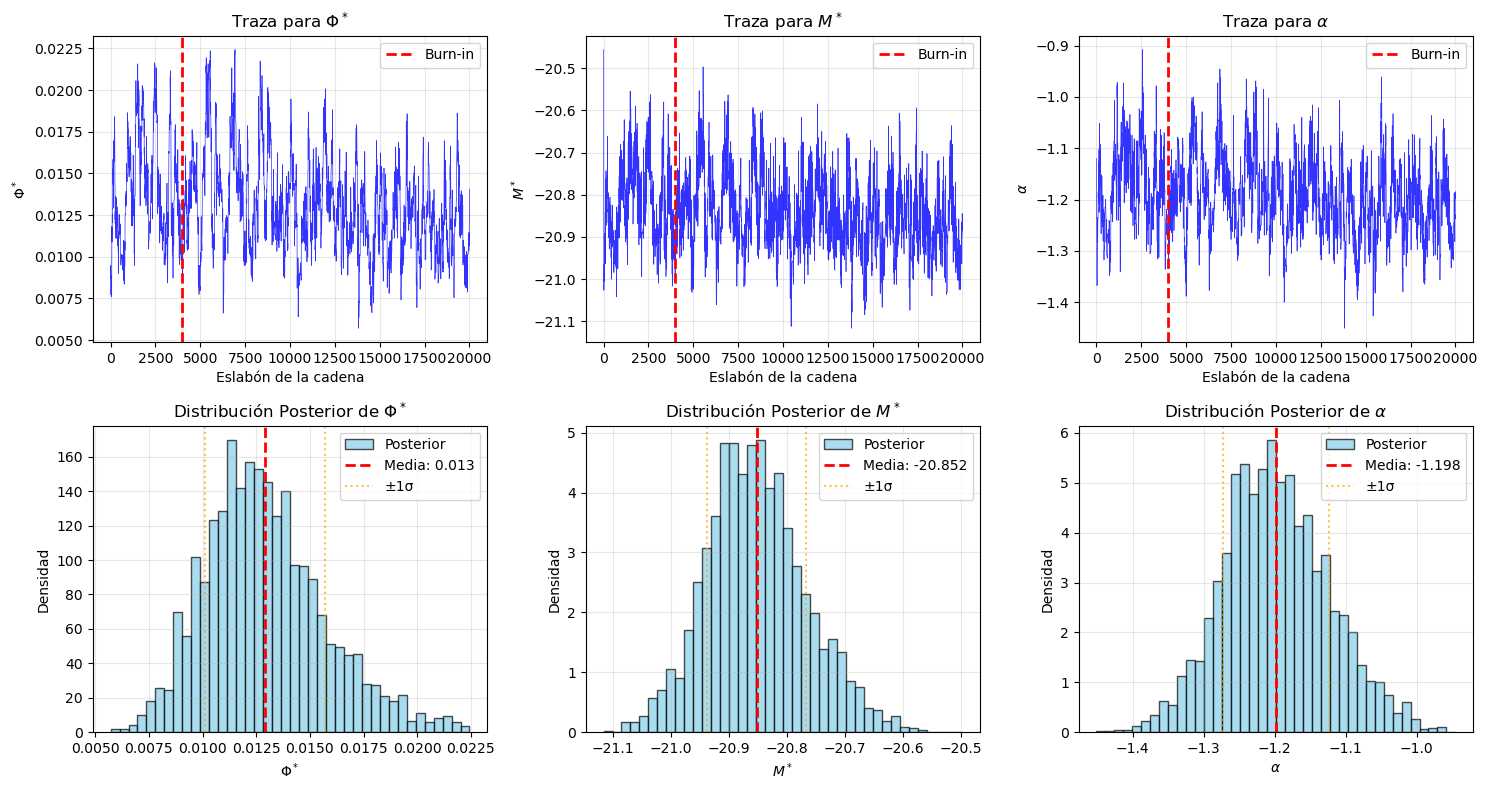


ESTIMACIONES DE PARÁMETROS POSTERIORES
$\Phi^*$: 0.0129 ± 0.0028
    Mediana: 0.0126
    IC 95%: [0.0082, 0.0193]

$M^*$: -20.8524 ± 0.0857
    Mediana: -20.8570
    IC 95%: [-21.0127, -20.6736]

$\alpha$: -1.1980 ± 0.0741
    Mediana: -1.2020
    IC 95%: [-1.3394, -1.0424]



In [52]:
# EJERCICIO 3: Inferencia Bayesiana de la Función de Luminosidad
print("=== EJERCICIO 3: INFERENCIA BAYESIANA DE LA FUNCIÓN DE LUMINOSIDAD ===")

# VERIFICACIÓN DE DATOS
if 'M_r' not in globals() or 'phi' not in globals():
    print("Error: Ejecuta primero el Ejercicio 2 para cargar los datos")
    raise ValueError("Datos de Blanton no disponibles")

# Usar errores más realistas si no existen
if 'phi_err' not in globals() or phi_err is None:
    phi_err = phi * 0.03  # Reducir a 3% en lugar de 10%
    print("  Usando errores sintéticos de 3%")
else:
    print("✓ Usando errores del archivo CSV")

print(f"Datos disponibles: M_r shape={M_r.shape}, phi shape={phi.shape}, phi_err shape={phi_err.shape}")
print(f"Rango de magnitudes: {M_r.min():.2f} a {M_r.max():.2f}")
print(f"Rango de phi: {phi.min():.2e} a {phi.max():.2e}")
print(f"Rango de errores: {phi_err.min():.2e} a {phi_err.max():.2e}")
print(f"Error relativo promedio: {np.mean(phi_err/phi)*100:.1f}%")

# 1. Parámetros iniciales - ORDEN CORRECTO: [phi_star, M_star, alpha]
initial_params = [0.01, -20.5, -1.0]  # [phi_star, M_star, alpha]

# 2. Parámetros del algoritmo MCMC - ORDEN CORRECTO: [phi_star, M_star, alpha]
N_STEPS = 20000
step_size = [0.001, 0.2, 0.05]  # [phi_star, M_star, alpha]

print(f"Iniciando MCMC con {N_STEPS} pasos...")
print(f"Parámetros iniciales: phi_star={initial_params[0]:.3e}, M_star={initial_params[1]}, alpha={initial_params[2]}")

# 3. Ejecutar el MCMC
mcmc_chain, acceptance_rate = rfx.mhschechter(
    M_r,           # Magnitudes
    phi,           # Función de luminosidad observada
    phi_err,       # Errores
    n_steps=N_STEPS,
    step_size=step_size,
    initial_params=initial_params
)

# 4. Mostrar resultados básicos
print(f"Cadena MCMC terminada. Tasa de aceptación: {acceptance_rate:.4f}")

# Verificar si la tasa de aceptación es razonable
if acceptance_rate < 0.2:
    print("  Tasa de aceptación baja - considera reducir step_size")
elif acceptance_rate > 0.7:
    print("  Tasa de aceptación alta - considera aumentar step_size")
else:
    print("✓ Tasa de aceptación apropiada")

# 5. Análisis de convergencia
BURN_IN = int(N_STEPS * 0.2)  # 20% burn-in
posterior_samples = mcmc_chain[BURN_IN:]

print(f"\nUsando burn-in de {BURN_IN} pasos ({BURN_IN/N_STEPS*100:.0f}% del total)")
print(f"Muestras posteriores: {len(posterior_samples)}")

# 6. Nombres de parámetros para visualización
param_names = [r'$\Phi^*$', r'$M^*$', r'$\alpha$']

# 7. VISUALIZACIÓN DE TRAZAS Y DISTRIBUCIONES POSTERIORES
fig = plt.figure(figsize=(15, 8))

# Primera fila: Trazas de las cadenas
for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    plt.plot(mcmc_chain[:, i], lw=0.5, alpha=0.8, color='blue')
    plt.axvline(BURN_IN, color='red', linestyle='--', linewidth=2, label='Burn-in')
    plt.title(f'Traza para {param_names[i]}', fontsize=12)
    plt.xlabel("Eslabón de la cadena")
    plt.ylabel(param_names[i])
    plt.legend()
    plt.grid(True, alpha=0.3)

# Segunda fila: Distribuciones posteriores marginales
for i in range(3):
    ax = plt.subplot(2, 3, i + 4)
    plt.hist(posterior_samples[:, i], bins=40, density=True, color='skyblue', 
             edgecolor='black', alpha=0.7, label='Posterior')
    
    # Calcular estadísticas
    mean_val = np.mean(posterior_samples[:, i])
    std_val = np.std(posterior_samples[:, i])
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                label=f'Media: {mean_val:.3f}')
    plt.axvline(mean_val - std_val, color='orange', linestyle=':', alpha=0.7)
    plt.axvline(mean_val + std_val, color='orange', linestyle=':', alpha=0.7, label=f'±1σ')
    
    plt.title(f'Distribución Posterior de {param_names[i]}', fontsize=12)
    plt.xlabel(param_names[i])
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. ESTADÍSTICAS PRELIMINARES
print("\n" + "="*80)
print("ESTIMACIONES DE PARÁMETROS POSTERIORES")
print("="*80)

for i, name in enumerate(param_names):
    mean_val = np.mean(posterior_samples[:, i])
    std_val = np.std(posterior_samples[:, i])
    percentiles = np.percentile(posterior_samples[:, i], [2.5, 50, 97.5])
    
    print(f"{name}: {mean_val:.4f} ± {std_val:.4f}")
    print(f"    Mediana: {percentiles[1]:.4f}")
    print(f"    IC 95%: [{percentiles[0]:.4f}, {percentiles[2]:.4f}]")
    print()

=== AJUSTE DE LA FUNCIÓN DE SCHECHTER ===
Parámetros del mejor ajuste:
φ* = 1.292e-02 Mpc⁻³ mag⁻¹
M* = -20.85 mag
α = -1.20
Agregando región de incertidumbre...


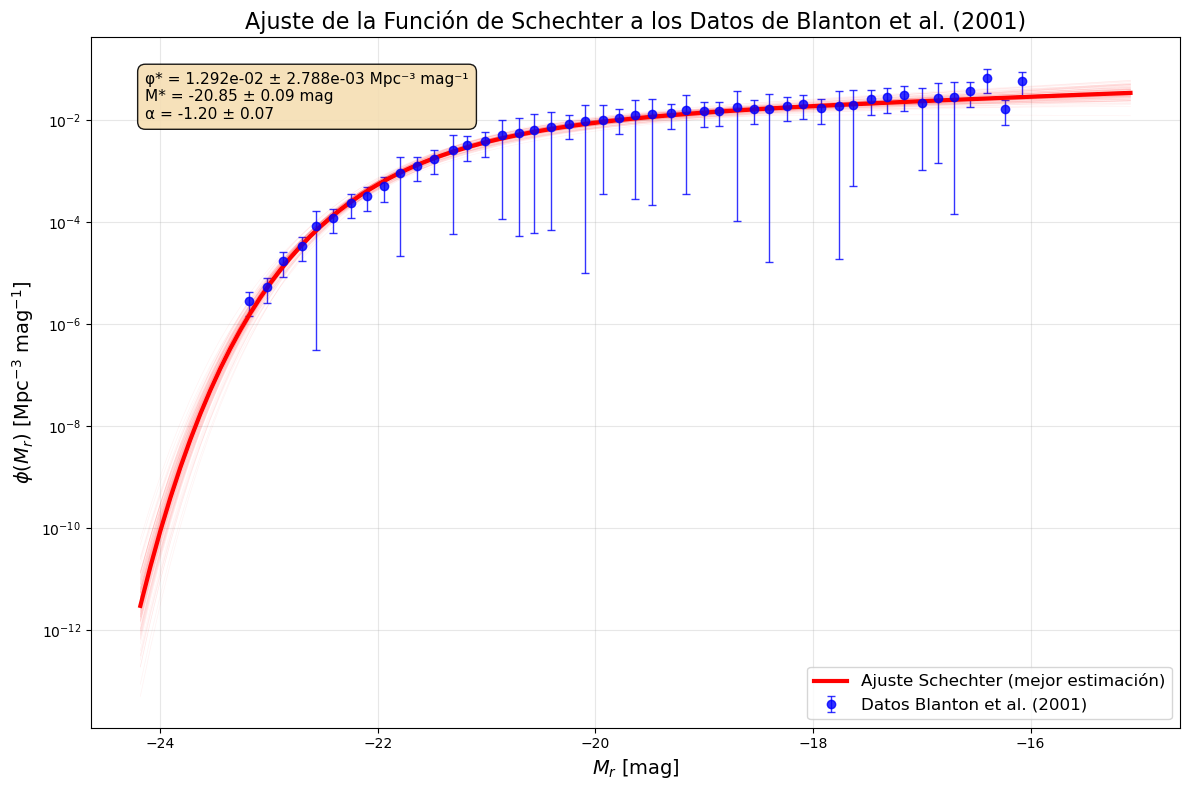


CALIDAD DEL AJUSTE
χ² = 7.44
Grados de libertad = 44
χ²/dof = 0.17
✓ Buen ajuste (χ²/dof < 1.5)

Resumen de residuos:
Residuo máximo: 4.09e-02
Residuo normalizado máximo: 1.35σ
RMS de residuos normalizados: 0.40

=== EJERCICIO 3 COMPLETADO ===
✓ MCMC ejecutado para función de Schechter
✓ Distribuciones posteriores obtenidas
✓ Parámetros estimados con incertidumbres
✓ Modelo ajustado y visualizado
✓ Calidad del ajuste evaluada


In [53]:
# AJUSTE DEL MODELO Y EVALUACIÓN DE LA CALIDAD
print("=== AJUSTE DE LA FUNCIÓN DE SCHECHTER ===")

# Modelo ajustado con parámetros posteriores
mean_params = np.mean(posterior_samples, axis=0)
phi_star_fit, M_star_fit, alpha_fit = mean_params

print(f"Parámetros del mejor ajuste:")
print(f"φ* = {phi_star_fit:.3e} Mpc⁻³ mag⁻¹")
print(f"M* = {M_star_fit:.2f} mag")
print(f"α = {alpha_fit:.2f}")

# VISUALIZACIÓN DEL AJUSTE
plt.figure(figsize=(12, 8))

# Datos observados
if phi_err is not None:
    plt.errorbar(M_r, phi, yerr=phi_err, fmt='o', color='blue', 
                markersize=6, capsize=3, capthick=1, elinewidth=1,
                label='Datos Blanton et al. (2001)', alpha=0.8)
else:
    plt.scatter(M_r, phi, color='blue', s=50, alpha=0.7,
               label='Datos Blanton et al. (2001)')

# Generar curva del modelo
M_model = np.linspace(M_r.min() - 1, M_r.max() + 1, 100)
phi_model = rfx.schechter_function(M_model, phi_star_fit, M_star_fit, alpha_fit)

plt.plot(M_model, phi_model, 'r-', linewidth=3, 
         label=f'Ajuste Schechter (mejor estimación)')

# Agregar región de incertidumbre con muestras de la posterior
print("Agregando región de incertidumbre...")
n_curves = 100
alpha_uncertainty = 0.05  # Transparencia para las curvas de incertidumbre

for i in range(0, len(posterior_samples), len(posterior_samples)//n_curves):
    params_sample = posterior_samples[i]
    phi_sample = rfx.schechter_function(M_model, params_sample[0], params_sample[1], params_sample[2])
    plt.plot(M_model, phi_sample, 'r-', alpha=alpha_uncertainty, linewidth=0.5)

# Formateo del gráfico
plt.yscale('log')
plt.xlabel('$M_r$ [mag]', fontsize=14)
plt.ylabel('$\\phi(M_r)$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=14)
plt.title('Ajuste de la Función de Schechter a los Datos de Blanton et al. (2001)', fontsize=16)

# Agregar texto con parámetros ajustados
textstr = f'φ* = {phi_star_fit:.3e} ± {np.std(posterior_samples[:, 0]):.3e} Mpc⁻³ mag⁻¹\n'
textstr += f'M* = {M_star_fit:.2f} ± {np.std(posterior_samples[:, 1]):.2f} mag\n'
textstr += f'α = {alpha_fit:.2f} ± {np.std(posterior_samples[:, 2]):.2f}'

props = dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.9)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# EVALUACIÓN DE LA CALIDAD DEL AJUSTE
print("\n" + "="*80)
print("CALIDAD DEL AJUSTE")
print("="*80)

# Calcular chi-cuadrado del ajuste
chi2 = np.sum(((phi - rfx.schechter_function(M_r, phi_star_fit, M_star_fit, alpha_fit)) / phi_err)**2)
dof = len(M_r) - 3  # grados de libertad

print(f"χ² = {chi2:.2f}")
print(f"Grados de libertad = {dof}")
print(f"χ²/dof = {chi2/dof:.2f}")

if chi2/dof < 1.5:
    print("✓ Buen ajuste (χ²/dof < 1.5)")
elif chi2/dof < 3.0:
    print("  Ajuste aceptable (1.5 < χ²/dof < 3.0)")
else:
    print(" Ajuste pobre (χ²/dof > 3.0)")

# Calcular residuos
residuos = phi - rfx.schechter_function(M_r, phi_star_fit, M_star_fit, alpha_fit)
residuos_normalizados = residuos / phi_err

print(f"\nResumen de residuos:")
print(f"Residuo máximo: {np.max(np.abs(residuos)):.2e}")
print(f"Residuo normalizado máximo: {np.max(np.abs(residuos_normalizados)):.2f}σ")
print(f"RMS de residuos normalizados: {np.sqrt(np.mean(residuos_normalizados**2)):.2f}")

print("\n=== EJERCICIO 3 COMPLETADO ===")
print("✓ MCMC ejecutado para función de Schechter")
print("✓ Distribuciones posteriores obtenidas")
print("✓ Parámetros estimados con incertidumbres")
print("✓ Modelo ajustado y visualizado")
print("✓ Calidad del ajuste evaluada")